**Import MNIST data using TensorFlow**

In [0]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [0]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

In [5]:
type(mnist.train.images)

numpy.ndarray

**Number of images for training, testing and validation**

In [10]:
mnist.train.num_examples

55000

In [11]:
mnist.test.num_examples

10000

In [12]:
mnist.validation.num_examples


5000

**Visualizing the data**

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

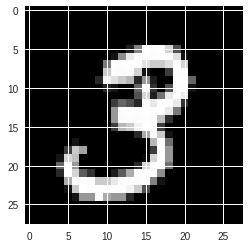

In [24]:
plt.imshow(mnist.train.images[1].reshape(28,28), cmap='gist_gray')

**Maximum and Minimum value of pixels in the image**

In [28]:
mnist.train.images[1].max()

1.0

In [29]:
mnist.train.images[1].min()

0.0

**Create the model**

In [0]:
x = tf.placeholder(tf.float32, shape=[None,784])

In [0]:
W = tf.Variable(tf.zeros([784,10]))

In [0]:
b = tf.Variable(tf.zeros([10]))

In [0]:
# create the graph
y = tf.matmul(x,W) + b

Loss and Optimizer

In [0]:
y_true = tf.placeholder(tf.float32, [None,10])

In [0]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y))

In [0]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)

In [0]:
train = optimizer.minimize(cross_entropy)

**Create the session**

In [0]:
init = tf.global_variables_initializer()

In [0]:
sess = tf.Session()
sess.run(init)
  
# Train the model for 1000 steps on the training set using built in batch feeder from mnist
for step in range(1000):
  batch_x, batch_y = mnist.train.next_batch(100)
  sess.run(train,feed_dict={x:batch_x, y_true:batch_y})

**Evaluate the trained model on test data**

In [58]:
matches = tf.equal(tf.argmax(y,1), tf.argmax(y_true,1))

acc = tf.reduce_mean(tf.cast(matches, tf.float32))

print(sess.run(acc,feed_dict={x:mnist.test.images, y_true:mnist.test.labels}))

0.916


In [0]:
sess.close()